## Table of content
* [A. Import modules](#Import_modules)  
* [B. Load data](#Load_data)  
* [C. Exploratory Data Analysis - satiscal analysis](#eda)
   * [1. Cholesterol level and heart disease](#chol)
   * [2. Diabetes spread in US population (in 1988)](#fbs)
   * [3. Age and heart disease](#age)
   * [4. Maximum heart rate achieved in exercise test and heart disease](#thalach)
   * [5. Maximum heart rate during exercise and heart disease](#cp_hd)
   * [6. Maximum heart rate during exercise and chest pain](#thalach_cp)
  
   

<a id='Import_modules'></a>

## A. Import modules

In [41]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# statistics
import scipy.stats as stat
import statsmodels.stats.multicomp as multicomp

<a id='Load_data'></a>

## B. Load data

The data are from a sample patients, from 1988, who were evaluated for heart disease at the [Cleveland Clinic Foundation](#https://archive.ics.uci.edu/ml/datasets/Heart+Disease). The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis by [Code Accademy](#https://www.codecademy.com/). The initial data set include more than 70 attributes. 9 were retained in the cleaned dataset which we will use for this analysis.

In [14]:
heart = pd.read_csv('heart_disease_2.csv')

In [15]:
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


* `age`: age in years
* `sex`: sex; 'male' or 'female'
* `trestbps`: resting blood pressure in mm Hg
* `chol`: serum cholesterol in mg/dl
* `cp`: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
* `exang`: whether the patient experiences exercise-induced angina (1: yes; 0: no)
* `fbs`: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
* `thalach`: maximum heart rate achieved in exercise test
* `heart_disease`: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

### Create subsets for sick / non-sick patients

In [16]:
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [17]:
yes_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 301
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            139 non-null    float64
 1   sex            139 non-null    object 
 2   trestbps       139 non-null    float64
 3   chol           139 non-null    float64
 4   cp             139 non-null    object 
 5   exang          139 non-null    float64
 6   fbs            139 non-null    float64
 7   thalach        139 non-null    float64
 8   heart_disease  139 non-null    object 
dtypes: float64(6), object(3)
memory usage: 10.9+ KB


In [18]:
no_hd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            164 non-null    float64
 1   sex            164 non-null    object 
 2   trestbps       164 non-null    float64
 3   chol           164 non-null    float64
 4   cp             164 non-null    object 
 5   exang          164 non-null    float64
 6   fbs            164 non-null    float64
 7   thalach        164 non-null    float64
 8   heart_disease  164 non-null    object 
dtypes: float64(6), object(3)
memory usage: 12.8+ KB


<a id='eda'></a>

## C. Exploratory Data Analysis - satiscal analysis

Goal is to better understand heart disease through potential association with other conditions and or health observations. Additionally this will develop an intuition about the potential drivers (and thus possible predictors) for heart diseases. We can list several associations/links which would make sense for that purpose:
 
* cholesterol and heart disease
* knowing that heart disease risk is increase by diabete, the proportion of the population with diabete
* age and heart disease
* heart rate during exercise and heart disease
* chest pain and heart disease
* chest pain and heart rate during exercise

These associations can be translated into the following questions:
1. Do people with/without heart disease diagnosed have high cholesterol levels?
2. Does the US population actually include 8% of people with diabetes?
3. Is age associated with wheter or not a patient will be diagnosed with heart disease?
4. Is there a link between maximum heart rate during exercise and heart disease diagnosis?
5. Is there a link between the type of chest pain and the diagnosis of heart disease ?
6. Is there a difference in average maximum heart rate during exercise between the different chest pain types?

<a id='chol'></a>

### 1. Cholesterol level and heart disease

Total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy)

`chol` indicate the level of cholesterol in mg/dl

Initial question is '*Do people with/without heart disease diagnosed have high cholesterol levels?*', which we can further break down into:
1. Do people **with heart disease** have high cholesterol levels (greater than or equal to 240 mg/dl) on average? 
2. Do people **without heart disease** have high cholesterol levels (greater than or equal to 240 mg/dl) on average?  

In [100]:
chol_hd = yes_hd.chol
chol_nhd = no_hd.chol

In [102]:
chol_hd_mean = np.mean(chol_hd)
chol_nhd_mean = np.mean(chol_no_hd)
print('Average cholesterol level of patients with heart disease: {chol_hd_mean} mg/dl'.format(
    chol_hd_mean=round(chol_hd_mean,2)))
print('Average cholesterol level of patients without heart disease: {chol_nhd_mean} mg/dl'.format(
    chol_nhd_mean=round(chol_nhd_mean,2)))

Average cholesterol level of patients with heart disease: 251.47 mg/dl
Average cholesterol level of patients without heart disease: 242.64 mg/dl


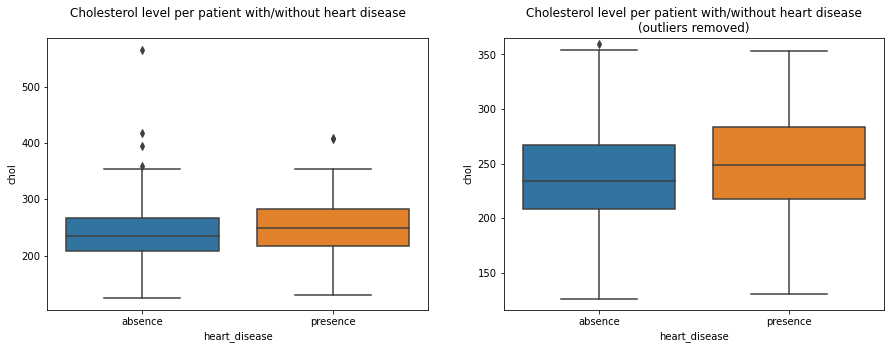

In [116]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=heart, x='heart_disease', y='chol')
plt.title('Cholesterol level per patient with/without heart disease\n ')

plt.subplot(122)
sns.boxplot(data=heart, x='heart_disease', y='chol')
plt.ylim(min(heart.chol)-10, 365)
plt.title('Cholesterol level per patient with/without heart disease\n(outliers removed)')
plt.show()

Visual inspection indicates a deviation in cholesterol level between the two groups, but it is difficult to assess if it is important (or significant).

In [71]:
print('1. Do people with heart disease have high cholesterol (greater than 240 mg/dl)\
      \n\nH0: people with hd have an average chol level of 240 mg/dl \
      \nH1: people with hd have an average chol level greater than 240 mg/dl \
      \n\nParameters: \
      \n- 1-sided mean comp. test \
      \n- alpha = 0.05 \n')

alpha = 0.05
dof = len(chol_hd) - 1
t, p = stat.ttest_1samp(chol_hd, 240)
# ttest_1sampl is a 2-sided test by default and argmuent 'alternative' of the function does not work here
# So I divide p by 2
p = p/2 
crit = stat.t.ppf(1 - alpha, dof)

print('t stat = %.4f, crit. val = %.4f, p = %.4f' % (t, crit, p))
if t > crit and p < alpha:
    print('\033[1mWe reject H0. People with hd have an avg chol level greater than 240 mg/dl.\033[0m')
else:
    print('\033[1mWe cannot reject H0. People with hd have an avg chol level of 240 mg/dl.\033[0m')


print('_____________________________\n')
    

print('2. Do people without heart disease have high cholesterol (greater than 240 mg/dl)\
      \n\nH0: people without hd have an average chol level of 240 mg/dl \
      \nH1: people without hd have an average chol level greater than 240 mg/dl \
      \n\nParameters: \
      \n- 1-sided mean comp. test \
      \n- alpha = 0.05 \n')

alpha = 0.05
dof = len(chol_nhd) - 1
t, p = stat.ttest_1samp(chol_nhd, 240)
# ttest_1sampl is a 2-sided test by default and argmuent 'alternative' of the function does not work here
# So I divide p by 2
p = p/2 
crit = stat.t.ppf(1 - alpha, dof)

print('t stat = %.4f, crit. val = %.4f, p = %.4f' % (t, crit, p))
if t > crit and p < alpha:
    print('\033[1mWe reject H0. People with hd have an avg chol level greater than 240 mg/dl.\033[0m')
else:
    print('\033[1mWe cannot reject H0. People without hd have an avg chol level of 240 mg/dl.\033[0m')

1. Do people with heart disease have high cholesterol (greater than 240 mg/dl)      

H0: people with hd have an average chol level of 240 mg/dl       
H1: people with hd have an average chol level greater than 240 mg/dl       

Parameters:       
- 1-sided mean comp. test       
- alpha = 0.05 

t stat = 2.7338, crit. val = 1.6560, p = 0.0035
We reject H0. People with hd have an avg chol level greater than 240 mg/dl.
_____________________________

2. Do people without heart disease have high cholesterol (greater than 240 mg/dl)      

H0: people without hd have an average chol level of 240 mg/dl       
H1: people without hd have an average chol level greater than 240 mg/dl       

Parameters:       
- 1-sided mean comp. test       
- alpha = 0.05 

t stat = 0.6325, crit. val = 1.6543, p = 0.2640
We cannot reject H0. People without hd have an avg chol level of 240 mg/dl.


<a id='fbs' ></a>

### 2. Diabetes spread in US population (in 1988)

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes).  
(text from [Code accademy](#https://www.codecademy.com/))

`fbs` column of dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl:  
* 1: fbs > 120 mg/dl
* 0: fbs <= 120 mg/dl

Initial question was '*Does the US population include more than 8% of people with diabetes?*' which we can, for statiscal testing, translate into:
* Is the sample representative/coming from the population where 8% of the individuals have and fbs level greater than 120 mg/dl?

In [84]:
num_patients = len(heart)
num_highfbs = len(heart[heart.fbs == 1])

xptd_num_highfbs = num_patients*0.08

In [158]:
print('1. Is the sample coming from a pop where 8% of the individuals have and fbs level greater than 120 mg/dl?\n')
print(f'Sample includes {num_patients} observations. {num_highfbs} patients have a high fbs level.')
print(f'We expect to see approximately {int(round(xptd_num_highfbs,0))} observations if the sample was representative.')
      
print('\nH0: this sample comes from a pop. where 8% of the people have an fbs > 120 mg/dl\
       \nH1: this sample comes from a pop. where more than 8% of the people have an fbs > 120\
       \n\nParameters: \n- 1-sided binomial test \n- alpha = 0.05\n')

alpha = 0.05
pval = stat.binom_test(x=num_highfbs_patients ,n=num_patients , p=0.08 , alternative='greater')
print('p = %.4f' % (pval))
if pval < alpha:
    print('\033[1mWe reject H0. \
The sample comes from a pop where there are more than 8% of the people with an fbs greater than 120.\033[0m')
else:
    print('\033[1mWe cannot reject H0. \
The sample comes from a pop where there are 8% of the people with an fbs greater than 120. \
The high number of people from the sample with an fbs greater than 120 is due to sampling hazard.\033[0m')

1. Is the sample coming from a pop where 8% of the individuals have and fbs level greater than 120 mg/dl?

Sample includes 303 observations. 45 patients have a high fbs level.
We expect to see approximately 24 observations if the sample was representative.

H0: this sample comes from a pop. where 8% of the people have an fbs > 120 mg/dl       
H1: this sample comes from a pop. where more than 8% of the people have an fbs > 120       

Parameters: 
- 1-sided binomial test 
- alpha = 0.05

p = 0.0000
We reject H0. The sample comes from a pop where there are more than 8% of the people with an fbs greater than 120.


<a id='age'></a>

### 3. Age and heart disease

Is age associated with wheter or not a patient will be diagnosed with heart disease?

In [241]:
age_hd = heart.age[heart.heart_disease == 'presence']
age_nhd = heart.age[heart.heart_disease == 'absence']

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=heart, x='heart_disease', y='age')
plt.title('Age distribution of patient with/without heart disease')

plt.subplot(122)
sns.histplot(data=age_nhd, alpha=0.5, label='No hd', color='blue')
sns.histplot(data=age_hd, alpha=0.5, label='hd', color='orange')
plt.legend()
plt.title('Age distribution of patient with/without heart disease')
plt.show()

Visual inspection points to a difference between ages of patients diasgnosed with heart disease and ages of patients without heat disease.

In [ ]:
print('H0: mean age with hd == mean without hd \
         \nH1: mean age with hd =\= mean age without hd\
         \n\nParameters:\
         \n- two-sided ttest (we could directly run a 1-sided lower tail ttest thanks to the visual inspection)\
         \n- alpha = 0.05\n')

alpha = 0.05
dof_age = len(age_hd) + len(age_no_hd) - 2
t_age, p_age = stat.ttest_ind(age_hd, age_no_hd)
crit_age = stat.t.ppf(1-alpha/2, dof_age)

print('t stat = %.4f, crit. val = %.4f, p = %.4f' % (t_age, crit_age, p_age))
if t_age > 0:
    if t_age > crit_age and p_age < alpha:
        print('\033[1mWe reject H0. \
The average age of people with hd is not equal to the average age of people without hd.\033[0m')
    else:
        print('\033[1mWe cannot reject H0.\033[0m')
else:
    if t_age < -crit_age and p_age < alpha:
        print('\033[1mThe average age of people with hd is not equal to the average age of people without hd.\033[0m')
    else:
        print('\033[1mWe cannot reject H0.\033[0m')

The statistic of the t-test is positive, and greater than the critical value for the right side of the probability distribution (1.968). We can even further conclude that the patients with heart disease have a higher average age than the patients without heart disease.

<a id='thalach'><a>

### 4. Maximum heart rate achieved in exercise test and heart disease

Is there a link between maximum heart rate during exercise and heart disease diagnosis?

`Thalach` gives us the highest heart rate that the patient achieved during this test.

In [132]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_nhd = heart.thalach[heart.heart_disease == 'absence']

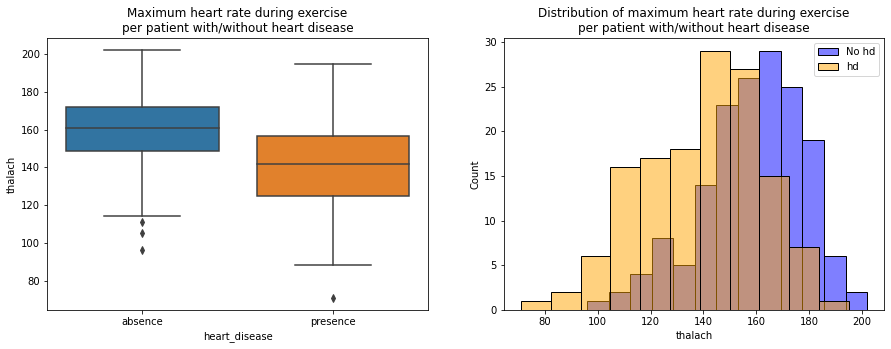

In [143]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=heart, x='heart_disease', y='thalach')
plt.title('Maximum heart rate during exercise\nper patient with/without heart disease')

plt.subplot(122)
sns.histplot(data=thalach_nhd, alpha=0.5, label='No hd', color='blue')
sns.histplot(data=thalach_hd, alpha=0.5, label='hd', color='orange')
plt.legend()
plt.title('Distribution of maximum heart rate during exercise\nper patient with/without heart disease')
plt.show()

Visual inspection points to an important difference in maximum heart rate during exercise between patients with heart disease and those without heart disease. Patients without heart disease have higher maximum heart rate during exercise in general.

In [188]:
print('H0: mean thalach_hd == mean thalach_nhd \
        \nH1: mean thalach_hd =\= mean thalach_nhd\
        \n\nParameters: \
        \n- two-sided ttest (we could directly run a 1-sided lower tail ttest thanks to the visual inspection)\
        \n- alpha = 0.05\n')

alpha = 0.05
dof = len(thalach_hd) + len(thalach_nhd) - 2
t, p = stat.ttest_ind(thalach_hd, thalach_no_hd)
crit = stat.t.ppf(1-(alpha/2), dof)

print('t stat = %.4f, crit. val = %.4f, p = %.4f' % (t, crit, p))
if t > 0:
    if t > crit and p < alpha:
        print('\033[1mWe reject H0. People with hd have a different thalach than people without hd')
    else:
        print('\033[1mWe cannot reject HO. People with hd and people without hd have a similar thalach')

else:
    if t < -crit and p < alpha:
        print('\033[1mWe reject H0. People with hd have a different thalach than people without hd.\033[0m')
    else:
        print('\033[1mWe cannot reject HO. People with hd and people without hd have a similar thalach.\033[0m')


H0: mean thalach_hd == mean thalach_nhd         
H1: mean thalach_hd =\= mean thalach_nhd        

Parameters:         
- two-sided ttest (we could directly run a 1-sided lower tail ttest thanks to the visual inspection)        
- alpha = 0.05

t stat = -7.9636, crit. val = 1.9679, p = 0.0000
We reject H0. People with hd have a different thalach than people without hd.


The statistic of the t-test is negative, and lower than the critical value for the left side of the probability distribution (-1.968). We can even further conclude that the patients with heart disease have a lower average maximum heart rate during exercise than the patients without heart disease.

<a id='cp_hd'></a>

### 5. Chest pain and heart disease

Is there a link between the type of chest pain and the diagnosis of heart disease ?

In [243]:
xtab = pd.crosstab(heart.heart_disease, heart.cp)
xtab

cp,asymptomatic,atypical angina,non-anginal pain,typical angina
heart_disease,,,,
absence,39,41,68,16
presence,105,9,18,7


In [244]:
print('H0: no link between the kind of chest pain and heart disease presence\
        \nH1: link between the kind of chest pain and heart disease presence\
        \n\nParameters:\
        \n- Chi2 test\
        \n- alpha = 0.05\n')

alpha = 0.05

chi2, p, dof, expected = stat.chi2_contingency(xtab)
crit = stat.chi2.ppf(1 - alpha, dof)

print(f'chi2 stat = %.4f, crit. val = %.4f, p = %.4f' % (chi2, crit, p))

if chi2 > critical_v and pval_chi2 < alpha:
    print('\033[1mWe reject H0. There is a link between the type of cp and heart disease presence.\033[0m')
else:
    print('We fail to reject H0.')

H0: no link between the kind of chest pain and heart disease presence        
H1: link between the kind of chest pain and heart disease presence        

Parameters:        
- Chi2 test        
- alpha = 0.05

chi2 stat = 81.8158, crit. val = 7.8147, p = 0.0000
We reject H0. There is a link between the type of cp and heart disease presence.


<a id='thalach_cp'></a>

### 6. Maximum heart rate during exercise and chest pain

Is there a difference in average maximum heart rate during exercise between the different chest pain types?

In [169]:
th_typ = heart.thalach[heart.cp == 'typical angina']
th_asy = heart.thalach[heart.cp == 'asymptomatic']
th_nan = heart.thalach[heart.cp == 'non-anginal pain']
th_ata = heart.thalach[heart.cp == 'atypical angina']

In [196]:
print('Typical angina - average maximum heart rate during exercice:', round(np.mean(th_typ), 2))
print('Asymptomatic - average maximum heart rate during exercice:', round(np.mean(th_asy), 2))
print('Non-anginal pain - average maximum heart rate during exercice:', round(np.mean(th_nan), 2))
print('Atypical angina - average maximum heart rate during exercice:', round(np.mean(th_ata), 2))

Typical angina - average maximum heart rate during exercice: 155.96
Asymptomatic - average maximum heart rate during exercice: 140.68
Non-anginal pain - average maximum heart rate during exercice: 155.41
Atypical angina - average maximum heart rate during exercice: 162.42


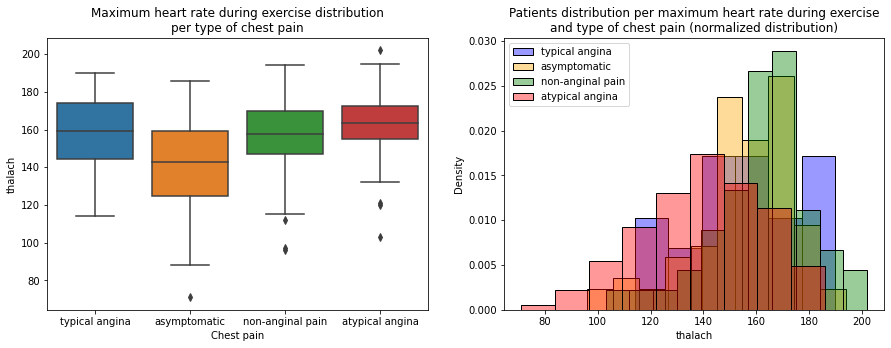

In [220]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(data=heart, x='cp', y='thalach')
plt.xlabel('Chest pain')
plt.title('Maximum heart rate during exercise distribution\nper type of chest pain')

plt.subplot(122)
sns.histplot(x=th_typ, alpha = 0.4, color = 'blue', stat='density', label='typical angina')
sns.histplot(x=th_nan, alpha = 0.4, color = 'orange', stat='density', label='asymptomatic')
sns.histplot(x=th_ata, alpha = 0.4, color = 'green', stat='density', label='non-anginal pain')
sns.histplot(x=th_asy, alpha = 0.4, color = 'red', stat='density', label='atypical angina')
plt.legend()
plt.title('Patients distribution per maximum heart rate during exercise\nand type of chest pain (normalized distribution)')
plt.show()

Visual inspection points to a difference between maximum heart rate during exercise of the patients with different type of chest pain:
* Asymptomatic patients seem to have a lower maximum heart rate during exercise than others
* Patients with an atypical angina seem to have a higher maximum heart rate during exercise than others

In [214]:
print('H0: Patients with different types of pain chest or asymptomatic all have the same average thalach.\
        \nH1: Patients with different types of pain chest or asymptomatic do not have the same average thalach.\
        \n\nParameters:\
        \n- Anova\
        \n- alpha 0.05\n')


alpha = 0.05
dfn = heart.cp.nunique() - 1 # nbr of groups - 1
dfd = len(heart) - heart.cp.nunique() # total nbr of observations - nbr of groups 

f, pval_ano = stat.f_oneway(th_typ ,th_asy, th_nan, th_ata)
cri_val_ano = stat.f.ppf(1-alpha, dfn, dfd)

print('f stat = %.4f, crit. val = %.4f, p = %.4f' % (f, cri_val_ano, pval_ano))

if f > cri_val_ano and pval_ano < alpha:
    print('\033[1mWe reject H0. People with different angine types do not have the same average thalach.\033[0m')
    print('We will run a Tuckey test to pair-wise compare the means of the different groups of patients.\n\n')
else:
    print('We cannot reject H0.\n')

tukey_res = multicomp.pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_res)

H0: Patients with different types of pain chest or asymptomatic all have the same average thalach.        
H1: Patients with different types of pain chest or asymptomatic do not have the same average thalach.        

Parameters:        
- Anova        
- alpha 0.05

f stat = 17.4131, crit. val = 2.6348, p = 0.0000
We reject H0. People with different angine types do not have the same average thalach.
We will run a Tuckey test to pair-wise compare the means of the different groups of patients.


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.75

#### Results  
The Tuckey test indicates that:
1. The avg maximum heart rate during exercise of patients with an `atypical angina` is significantly higher than the one from `asymptomatic` patients
2. The avg maximum heart rate during exercise of patients with a `non-anginal pain` is significantly higher than the one from `asymptomatic` patients
3. The avg maximum heart rate during exercise of patients with a `typical angina` is significantly higher than the one from `asymptomatic` patients
4. The avg maximum heart rate during exercise of patients from the `atypical angina`, `typical` and `non-anginal pain` groups are not significantly different from each others